<a href="https://colab.research.google.com/github/ast-abo/ShotTracker/blob/Export-Model/ShotTrackerModelTraingScript.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import sys

drive.mount('/content/gdrive')
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
nb_path = '/content/notebooks'
sys.path.insert(0, nb_path)  # or append(nb_path)
#The last three lines are what changes the path of the file.
!pip install --target=$nb_path


In [17]:
from roboflow import Roboflow
import os
import ultralytics
HOME = os.getcwd()
print(HOME)
ultralytics.checks()

ModuleNotFoundError: No module named 'yolo'

In [3]:
import os
import shutil

!yolo task=detect mode=predict model=yolo11n.pt conf=0.25 source='https://hc-cdn.hel1.your-objectstorage.com/s/v3/9b5aca918f91e5abfa21b0457b0022116ff32412_photo-1629901925121-8a141c2a42f4.jpeg' save=True

# Define paths
OutputDirectory = "runs/detect/predict"
OldFileName = "9b5aca918f91e5abfa21b0457b0022116ff32412_photo-1629901925121-8a141c2a42f4.jpg"  # The original file name
NewFileName = "ball.jpg"  # The desired new name

# Rename the file
OldFilePath = os.path.join(OutputDirectory, OldFileName)
NewFilePath = os.path.join(OutputDirectory, NewFileName)
print(OldFilePath)


try:
    shutil.move(OldFilePath, NewFilePath)
    print(f"File renamed to {NewFilePath}")
except Exception as e:
    print(f"Error renaming file: {e}")

/bin/bash: line 1: yolo: command not found
runs/detect/predict/9b5aca918f91e5abfa21b0457b0022116ff32412_photo-1629901925121-8a141c2a42f4.jpg
Error renaming file: [Errno 2] No such file or directory: 'runs/detect/predict/9b5aca918f91e5abfa21b0457b0022116ff32412_photo-1629901925121-8a141c2a42f4.jpg'


In [4]:
from ultralytics import YOLO
from PIL import Image
import requests

model = YOLO('yolo11n.pt')
image = Image.open(requests.get('https://hc-cdn.hel1.your-objectstorage.com/s/v3/9b5aca918f91e5abfa21b0457b0022116ff32412_photo-1629901925121-8a141c2a42f4.jpeg', stream=True).raw)
result = model.predict(image, conf=0.25)[0]


0: 640x448 1 person, 1 clock, 194.9ms
Speed: 9.9ms preprocess, 194.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 448)


In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

rf = Roboflow(api_key="NLWnQPigGaE8pl98gFYh")
project = rf.workspace("icespace").project("shot-tracker-ik6bf")
version = project.version(2)
dataset = version.download("yolov11")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Shot-Tracker-2 in yolov11:: 100%|██████████| 52/52 [00:00<00:00, 4917.34it/s]


In [ ]:
%cd {HOME}

results = model.train(data="/content/datasets/Shot-Tracker-2/data.yaml", epochs=1, imgsz=640)

In [8]:
!ls /content/datasets/Shot-Tracker-2/train

images	labels


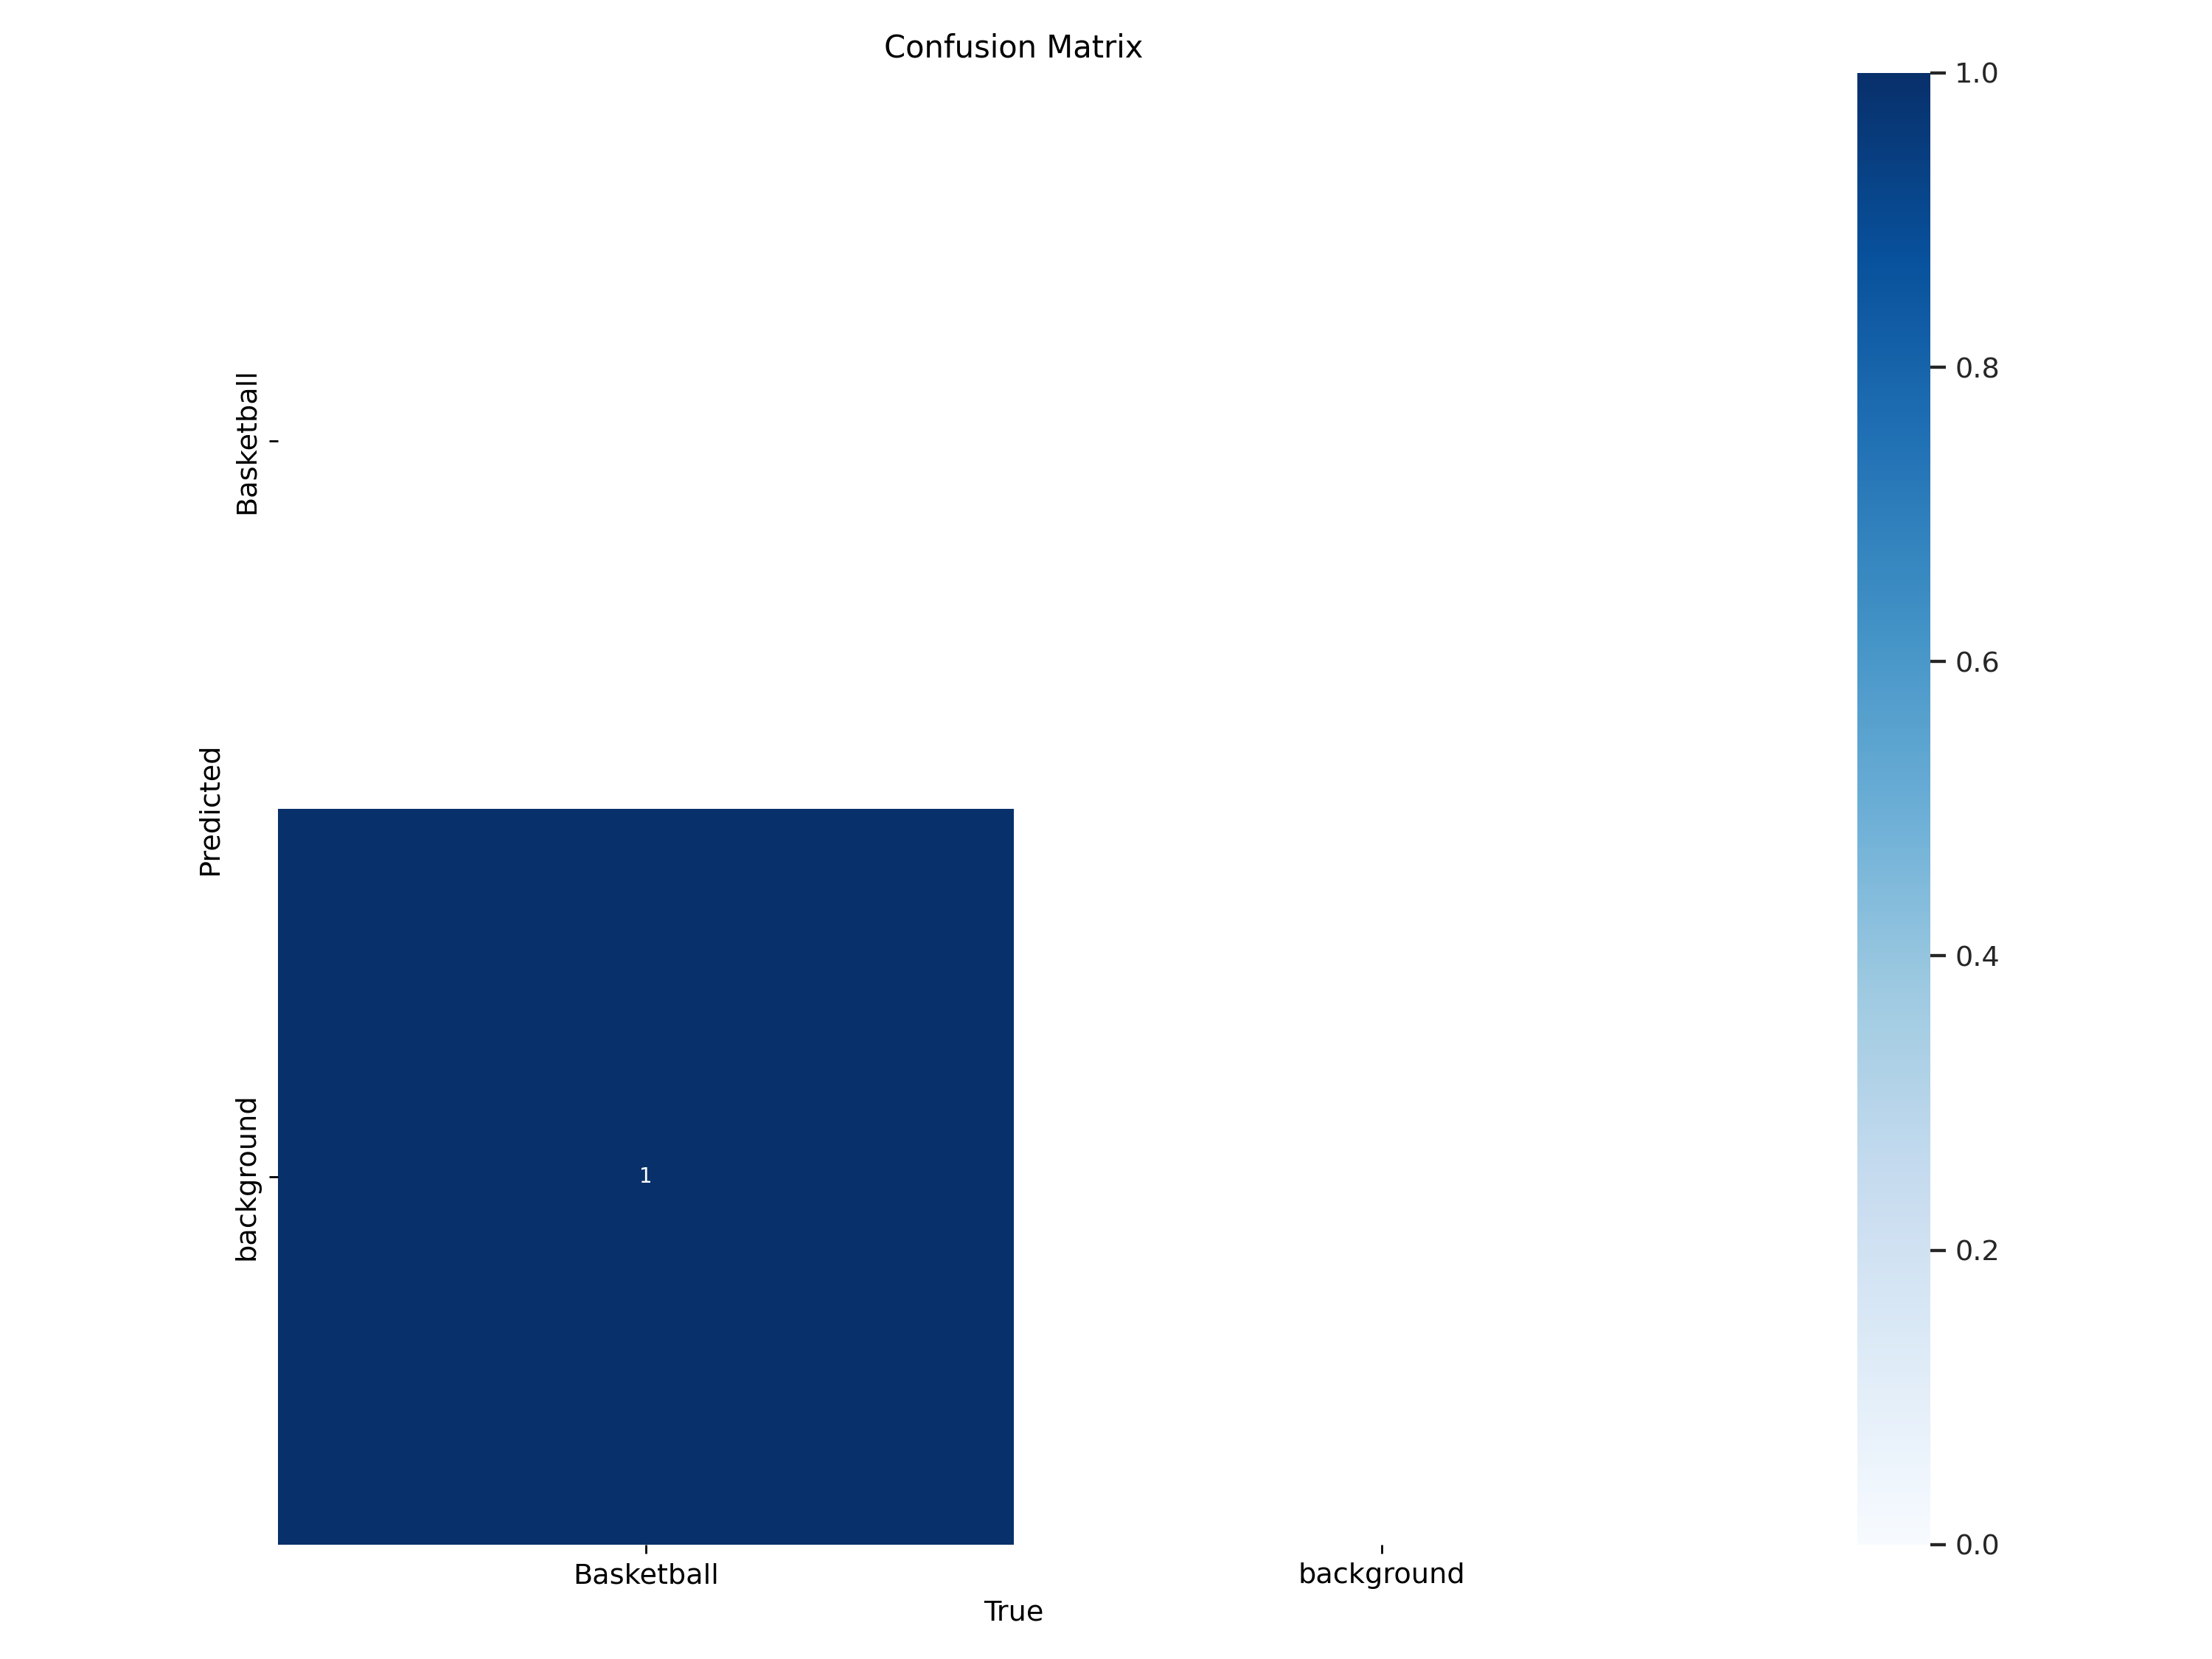

In [10]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

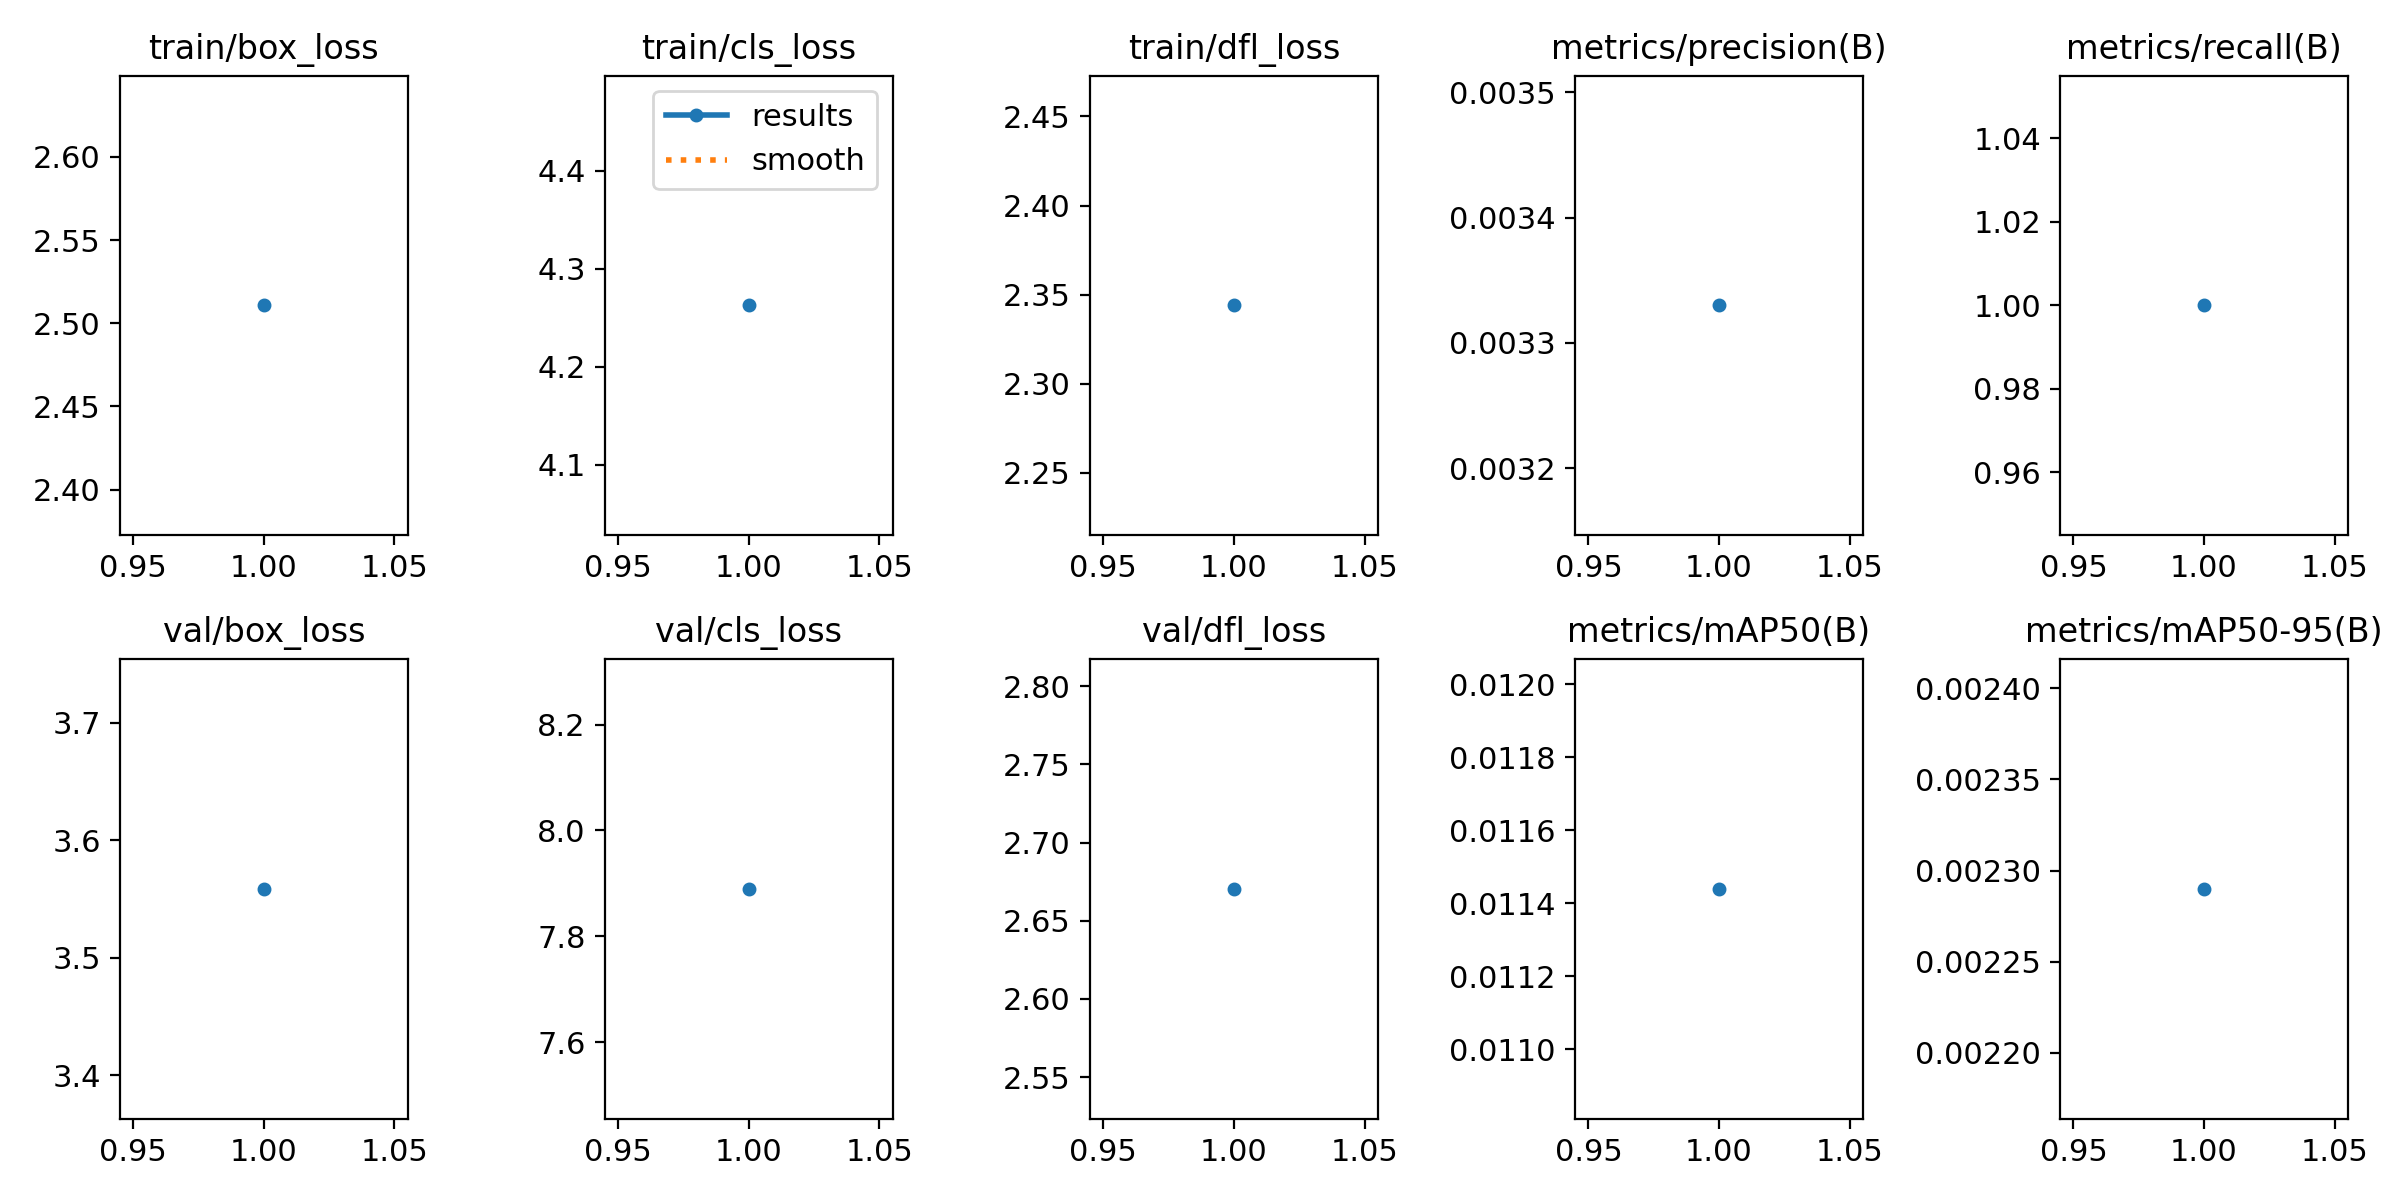

In [11]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

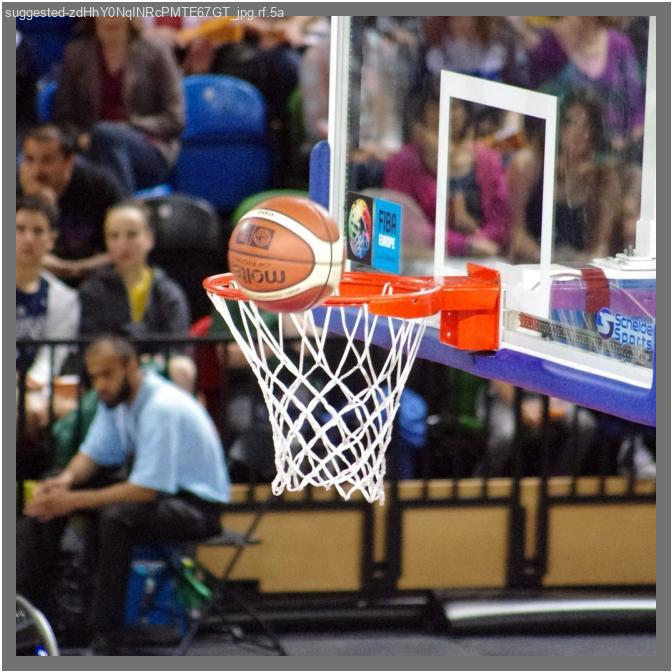

In [12]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [16]:
# !yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/bin/bash: line 1: yolo: command not found


In [18]:
# project.version(dataset.version).deploy(model_type="yolov11", model_path=f"{HOME}/runs/detect/train/")

NameError: name 'project' is not defined

Running inference on suggested-XWTvfDY1tLS473huZiKG_jpg.rf.e6aa4bff9f99c3b197c11a6d7d165961.jpg

0: 640x640 2 persons, 1 vase, 242.0ms
Speed: 4.4ms preprocess, 242.0ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


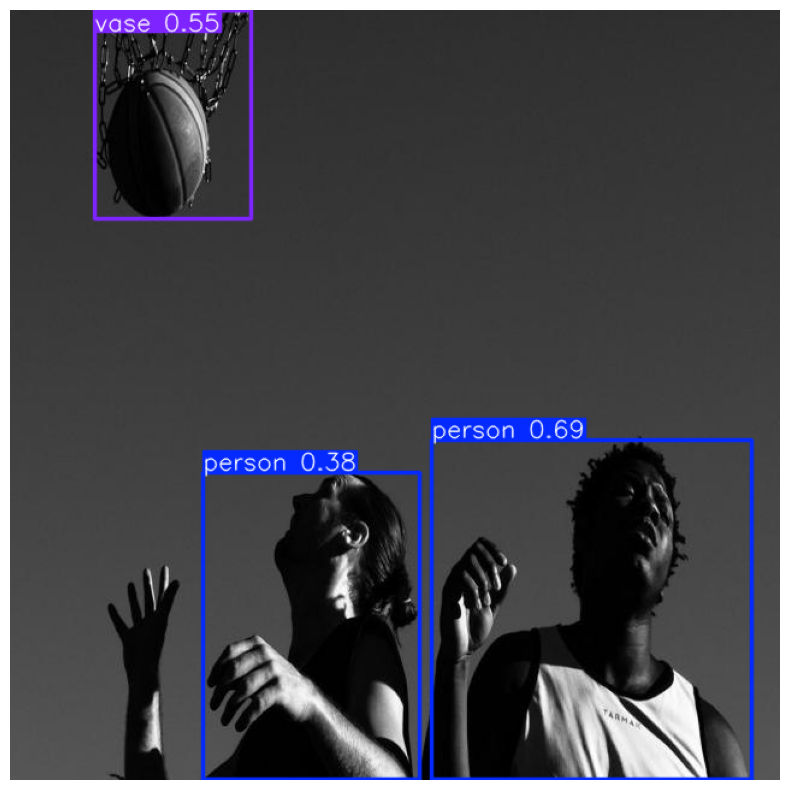

In [19]:
import os, random, cv2
import supervision as sv
import IPython
import matplotlib.pyplot as plt

# Location of test set images
test_set_loc = '/content/datasets/Shot-Tracker-2/test/images'
test_images = os.listdir(test_set_loc)

# Run inference on 4 random test images, or fewer if fewer images are available
for img_name in random.sample(test_images, min(4, len(test_images))):
    # Load image
    image = cv2.imread(os.path.join(test_set_loc, img_name))
    if image is None:
      continue

    print("Running inference on " + img_name)

    # Perform inference
    results = model(image)
    annotatedImage = results[0].plot()

    # Display the image using Matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(annotatedImage, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper display
    plt.axis("off")  # Hide axis for better visualization
    plt.show()

In [ ]:
# Load the YOLO11 model

# Export the model to TFLite format
model.export(format="torchscript")

# Load the exported TFLite model
# tflite_model = YOLO("yolo11n_float32.tflite")

# Run inference
# results = tflite_model("https://ultralytics.com/images/bus.jpg")

Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from 'yolo11n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (5.4 MB)

TorchScript: starting export with torch 2.6.0+cu124...
TorchScript: export success ✅ 3.4s, saved as 'yolo11n.torchscript' (10.5 MB)

Export complete (4.0s)
Results saved to /content
Predict:         yolo predict task=detect model=yolo11n.torchscript imgsz=640  
Validate:        yolo val task=detect model=yolo11n.torchscript imgsz=640 data=/usr/src/ultralytics/ultralytics/cfg/datasets/coco.yaml  
Visualize:       https://netron.app


'yolo11n.torchscript'